In [1]:
import numpy as np
import pandas as pd 
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [2]:
dQI = pd.read_csv('DataForImpact/dQI.csv', index_col=False) 
dQI, dQI_test = train_test_split(dQI, test_size = 0.1, shuffle=False)

/tmp/ipykernel_5938/3874371403.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dQI = pd.read_csv('DataForImpact/dQI.csv', index_col=False)


GOW model

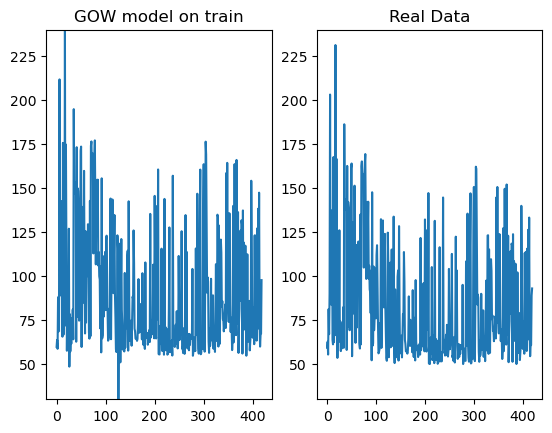

In [12]:
MI = np.array(dQI[' Impact'])
dQ= np.array(dQI[' DeltaQ'])
T = np.array(dQI['Time'])


def fun(x, mi: np.array, mi_prev: np.array, dq: np.array, dt: np.array):
            return np.power(x[0], dt) * mi_prev + x[1] * dq - mi

res_lsq = least_squares(fun, np.array([1., 0.5]), args=(MI[1:], MI[:-1], dQ[1:], np.diff(T)))

Ipred = np.power(res_lsq.x[0], np.diff(T)) * MI[:-1] + res_lsq.x[1] * dQ[:-1]

plt.figure()

plt.subplot(121)
plt.plot(np.arange(len(Ipred)), Ipred)
plt.ylim(30, 240)
plt.title("GOW model on train")
plt.subplot(122)
plt.plot(np.arange(len(MI)), np.array(MI))
plt.ylim(30, 240)
plt.title("Real Data")

plt.show()

In [13]:
print(res_lsq)

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.432e+00  8.333e+00 ... -1.934e+01  5.091e+00]
           x: [ 9.999e-01  2.238e-02]
        cost: 326417.1414427492
         jac: [[ 3.236e+04  2.045e+02]
               [ 4.307e+04  2.054e+02]
               ...
               [ 9.106e+02  3.969e+02]
               [ 1.332e+03  4.127e+02]]
        grad: [ 8.061e+03  6.518e-03]
  optimality: 8061.375777209535
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 8
        njev: 8


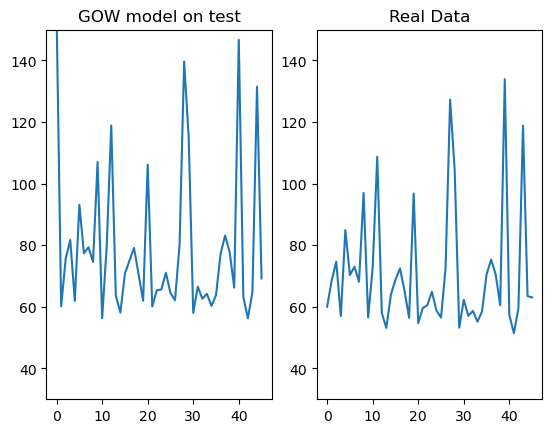

Average percent of mistake:  0.33185080886305474


In [14]:
MI = np.array(dQI_test[' Impact'])
dQ= np.array(dQI_test[' DeltaQ'])
T = np.array(dQI_test['Time'])

Ipred = np.power(res_lsq.x[0], np.diff(T)) * MI[:-1] + res_lsq.x[1] * dQ[:-1]

plt.figure()

plt.subplot(121)
plt.plot(np.arange(len(Ipred)), Ipred)
plt.ylim(30, 150)
plt.title("GOW model on test")
plt.subplot(122)
plt.plot(np.arange(len(MI[1:])), np.array(MI[1:]))
plt.ylim(30, 150)
plt.title("Real Data")

plt.show()

print('Average percent of mistake: ', sum(abs((Ipred - MI[1:])/MI[1:])) / len(Ipred))

Square root model

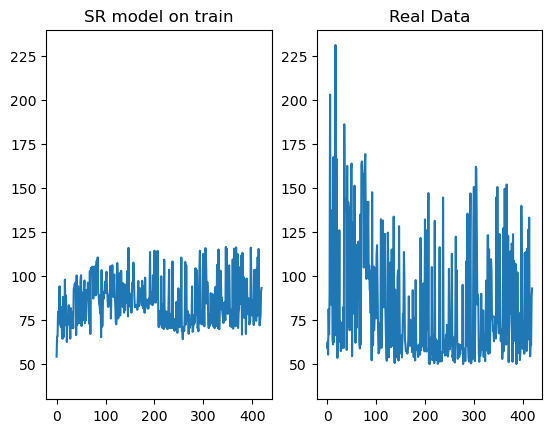

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 2.956e+00  1.036e+01 ...  2.513e+00  2.767e-01]
           x: [ 4.590e+00]
        cost: 116558.05485766592
         jac: [[ 1.430e+01]
               [ 1.433e+01]
               ...
               [ 1.992e+01]
               [ 2.031e+01]]
        grad: [-2.592e-05]
  optimality: 2.5918245527556394e-05
 active_mask: [ 0.000e+00]
        nfev: 5
        njev: 4


In [15]:
MI = np.array(dQI[' Impact'])
dQ= np.array(dQI[' DeltaQ'])
T = np.array(dQI['Time'])

def fun(x, mi: np.array, dq: np.array):
            return x[0] * np.power(dq, 0.5) - mi

res_lsq = least_squares(fun, np.array([1.]), args=(MI[1:], dQ[1:]))


Ipred = res_lsq.x[0] * np.power(dQ, 0.5)

plt.figure()

plt.subplot(121)
plt.plot(np.arange(len(Ipred)), Ipred)
plt.ylim(30, 240)
plt.title("SR model on train")
plt.subplot(122)
plt.plot(np.arange(len(MI)), np.array(MI))
plt.ylim(30, 240)
plt.title("Real Data")

plt.show()

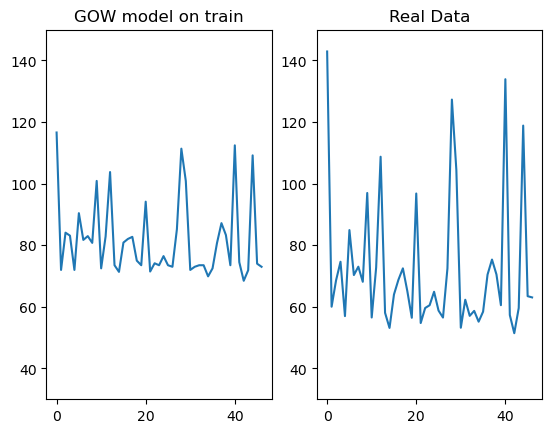

Average percent of mistake:  0.19608889450134853


In [9]:
MI = np.array(dQI_test[' Impact'])
dQ= np.array(dQI_test[' DeltaQ'])
T = np.array(dQI_test['Time'])

Ipred = res_lsq.x[0] * np.power(dQ, 0.5)

plt.figure()

plt.subplot(121)
plt.plot(np.arange(len(Ipred)), Ipred)
plt.ylim(30, 150)
plt.title("SR model on test")
plt.subplot(122)
plt.plot(np.arange(len(MI)), np.array(MI))
plt.ylim(30, 150)
plt.title("Real Data")

plt.show()

print('Average percent of mistake: ', sum(abs((Ipred - MI)/MI)) / len(Ipred))

ARX(2, 1)

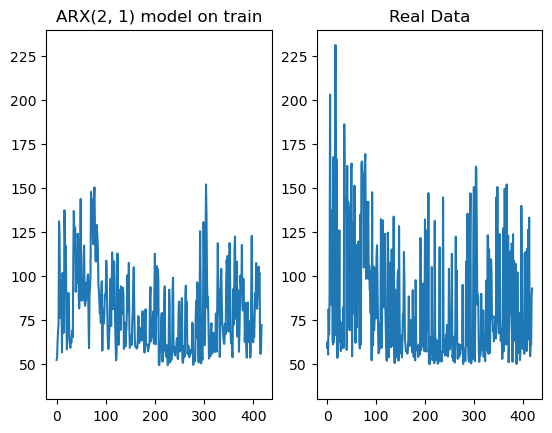

In [88]:
MI = np.array(dQI[' Impact'])
dQ= np.array(dQI[' DeltaQ'])
T = np.array(dQI['Time'])


def fun(x, mi: np.array, mi_prev: np.array, mi_prev_prev:np.array, dq: np.array):
            return x[0] * mi_prev + x[1] * mi_prev_prev +  x[2] * dq - mi

res_lsq = least_squares(fun, np.array([1., 0.5, 1.]), args=(MI[2:], MI[1:-1], MI[:-2], dQ[:-2]))

Ipred = res_lsq.x[0] * MI[1:-1] + res_lsq.x[1] * MI[:-2] +  res_lsq.x[2] * dQ[:-2]

plt.figure()

plt.subplot(121)
plt.plot(np.arange(len(Ipred)), Ipred)
plt.ylim(30, 240)
plt.title("ARX(2, 1) model on train")
plt.subplot(122)
plt.plot(np.arange(len(MI)), np.array(MI))
plt.ylim(30, 240)
plt.title("Real Data")

plt.show()

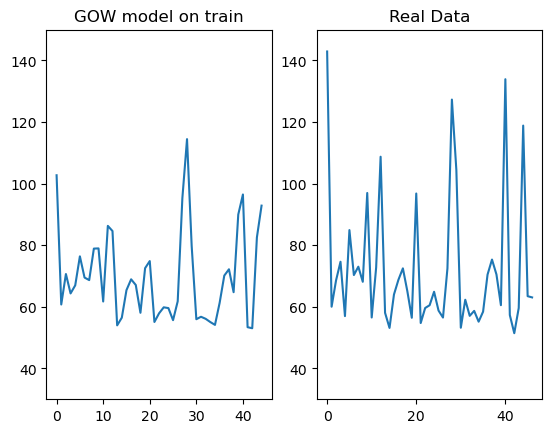

Average percent of mistake:  0.2754883235528584


In [91]:
MI = np.array(dQI_test[' Impact'])
dQ= np.array(dQI_test[' DeltaQ'])
T = np.array(dQI_test['Time'])

Ipred = res_lsq.x[0] * MI[1:-1] + res_lsq.x[1] * MI[:-2] +  res_lsq.x[2] * dQ[:-2]

plt.figure()

plt.subplot(121)
plt.plot(np.arange(len(Ipred)), Ipred)
plt.ylim(30, 150)
plt.title("GOW model on train")
plt.subplot(122)
plt.plot(np.arange(len(MI)), np.array(MI))
plt.ylim(30, 150)
plt.title("Real Data")

plt.show()

print('Average percent of mistake: ', sum(abs((Ipred - MI[2:])/Ipred)) / len(Ipred))